# Hexike Basis and Rotations
Below we go through a script for generating rotated and sheered basis over hexagonal apertures. Note `dLux` provides better tools for working with the James Webb Space Telecope primary aperture.

In [1]:
from layers import *
from matplotlib import pyplot

First we create the basis class with nil values for the rotations and sheers. As per the docstring `rmax` indicates the proportion of the pixel grid that we want to be covered by the aperture. 

Similarly `x` and `y` are proportional movements. Think of the question what proportion of the pixel grid do I want to move the basis. This is going to change in future versions where all user inputs will be in phyiscal units. 

In [2]:
hex_basis = HexagonalBasis(
    nterms=9,
    npix=256,
    rmax=1.,
    theta=0.,
    phi=0.,
    x=0.,
    y=0.)

The `__call__` dunder method of the `HexagonalBasis` class is inherited from `Basis` and instantly applies the phase difference to a `Wavefront`. To independently get the basis we use the private `_basis` method. 

Compile time is lengthy and runtime is not ideal. To make the code `jit`-able and `grad`-able sacrifices were made regarding performance. Hopefully this will be fixed in future versions. 

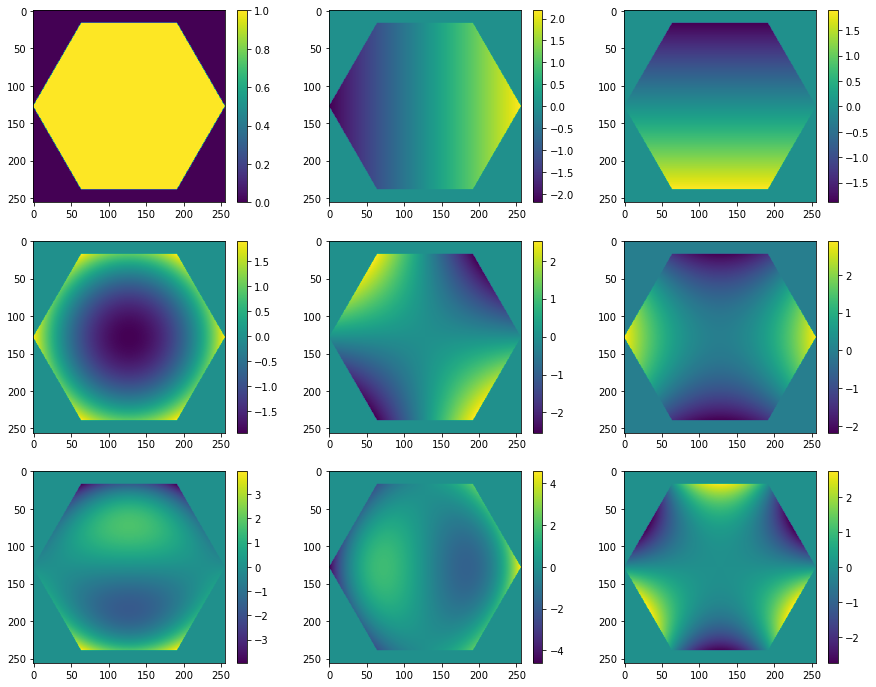

In [5]:
basis = hex_basis._basis()

figure = pyplot.figure(figsize=(15, 12))
for i in range(9):
    pyplot.subplot(3, 3, i + 1)
    pyplot.imshow(basis[i])
    pyplot.colorbar()

Now is where the magic happens. We may want to move the Basis vectors around and shrink them so that we may stack our basis into a 4 dimensional tensor with the shape `(nhex, nterms, npix, npix)` and multiply by a `(nterms, nhex)`  matrix of coefficients. 

We can either re-use the same instance or instantiate many. The advantage to re-use is that the `_basis` method is compiled. However, if this script is not dynamic and time is not an issue then multiple instances will save you time. 

Let's generate a very crude model of the JWST primary aperture basis. There are better ones currently in development.

In [19]:
basis = []
for i in range(6):
    basis.append(hex_basis\
        .set_magnification(0.2)\
        .set_x_offset(2. * np.cos(i * np.pi / 3))\
        .set_y_offset(2. * np.sin(i * np.pi / 3))\
        ._basis())
basis = np.stack(basis)

In [22]:
b = basis.sum(axis=0)

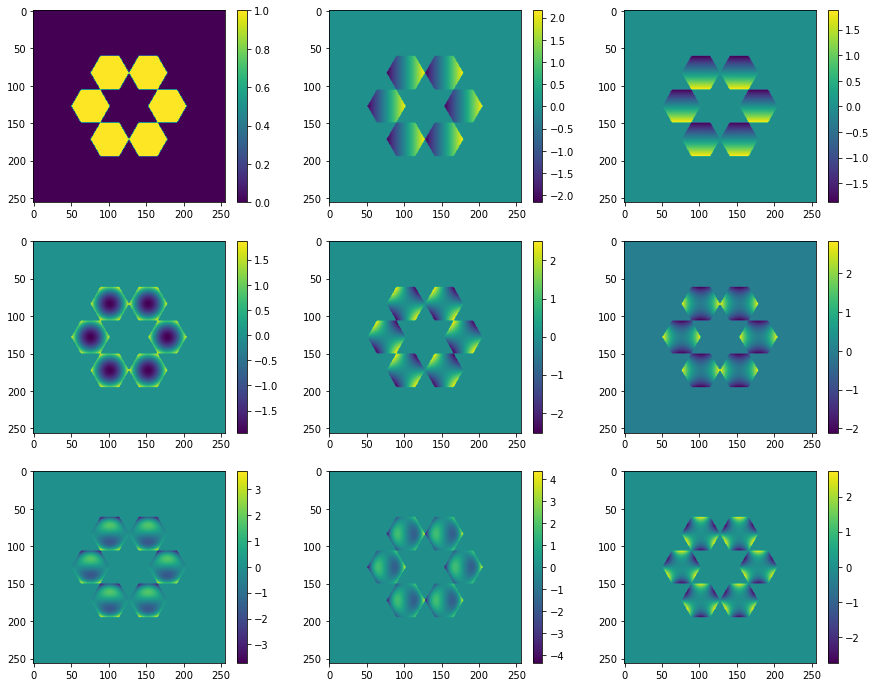

In [23]:
figure = pyplot.figure(figsize=(15, 12))
for i in range(9):
    pyplot.subplot(3, 3, i + 1)
    pyplot.imshow(b[i])
    pyplot.colorbar()